# Strategic Trading and Investment Opportunities:
## Grayscale Bitcoin Trust (GBTC) & Bitcoin

##### Produced by Weston McDonald

----------------------------------------------------------------------------------------------------------------------

## Summary:

I propose a unique strategy for trading Grayscale Bitcoin Trust (GBTC) and Bitcoin using data derived from financial disclosures, social media, public markets and indexes, and intuition around derivatives markets. This data is taken through an exploratory analysis which validates a number of assumptions and provides insight into additional features which could enhance the trading model. 

Initially, I lay out the background, grounds, and inspiration for the strategy; this is proceeded by the explanation of the strategy itself *(Sec. "The Strategy")* with its corresponding analysis.

Finally, I propose a number of opportunities for further research and analysis should the team deem it profitable to dedicate more focus toward this strategy.

----------------------------------------------------------------------------------------------------------------------

## Overview: Grayscale Bitcoin Trust (GBTC)
GBTC is an exchange traded security representing ownership in the Grayscale Bitcoin Trust, an SEC reporting investment trust which passively and ongoingly invests in Bitcoin. Owning 1 share of GBTC is virtually the same as owning .001 Bitcoin (though this exact ratio is currently ~0.000955 Bitcoin due to Grayscale's handling of management fees). Periodic private placement allows institutional or accredited investors to be issued by the trust new shares of GBTC at NAV upon depositing cash or in-kind (Bitcoin) with the trust. After a holding period of 12/6 months (pre/post April 20, 2020), these investors may trade their GBTC shares on secondary markets. No redemption program currently exists for the trust to redeem GBTC shares for original deposits; trading out of a GBTC position acquired through private placement requires the use of secondary markets. 

## A Closer Look into Grayscale's Recent Financial History:

#### Grayscale Bitcoin Trust's AUM has been dramatically increasing:

- Jan 1, 2019: **~204,000 BTC**
- Dec 31, 2019: **~262,000 BTC**
- Jun 1, 2020: **~387,000 BTC**
- Current: **~471,000 BTC**

Source: Grayscale 10Q (June 30, 2020)

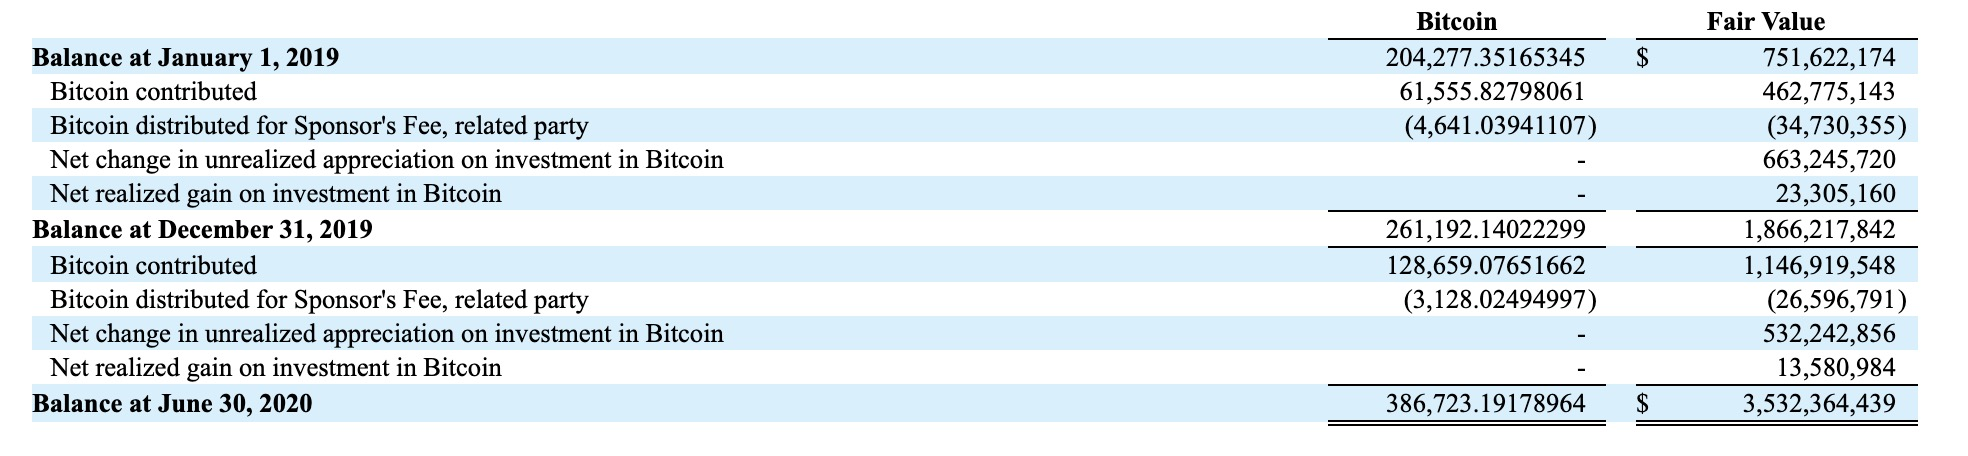

*Note: The following graphs were pulled from a journalist which had access to a quarterly report sent to investors which includes information from their public quarterly report presented in graphical form.*
<br><br>
**The majority of GBTC shares** are issued upon in-kind deposits, meaning investors already own Bitcoin. This alludes to the idea that investors are converting their supply of bitcoin into GBTC to possibly capitalize off of the tax advantaged benefits and high premiums.

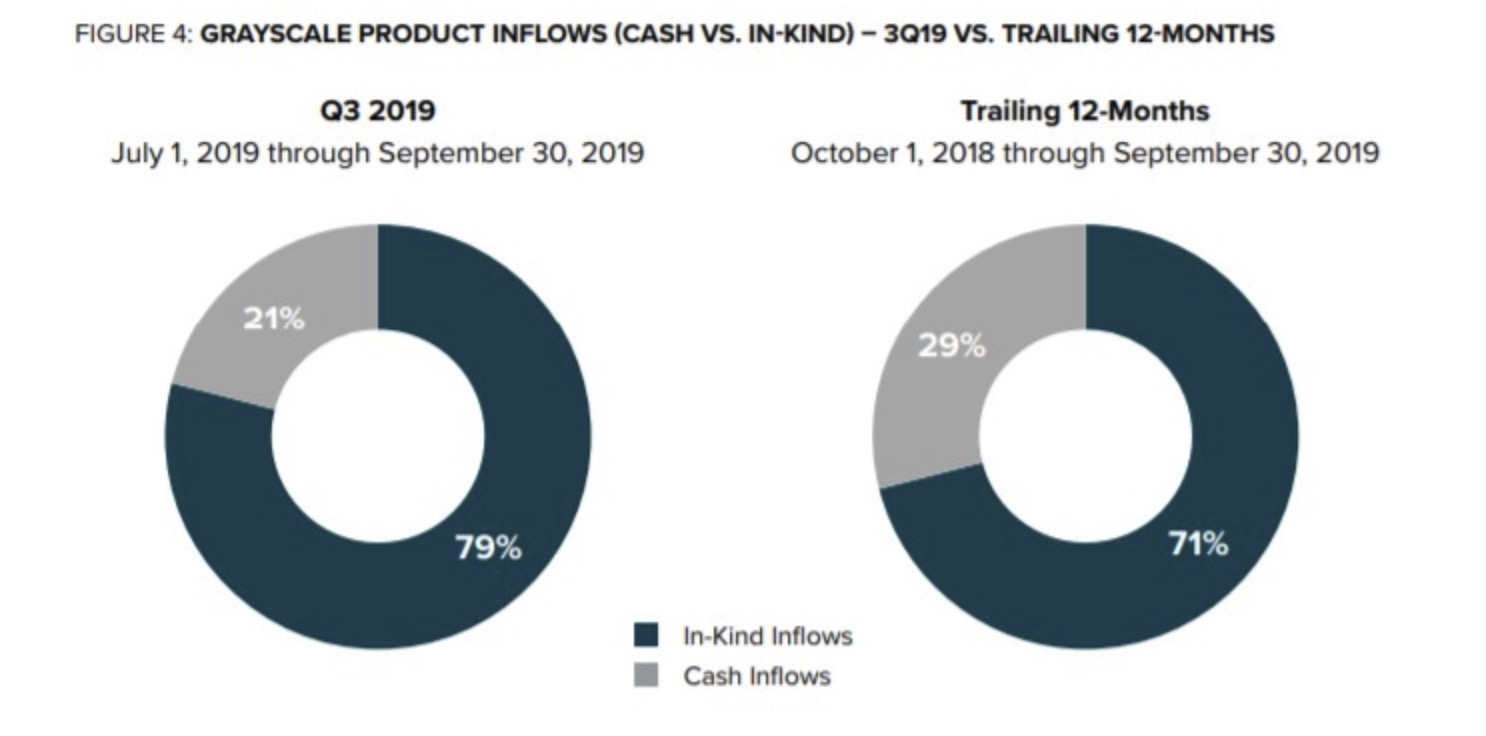

**Below,** we see that the majority of GBTC investors are institutional. Institutional investors, due to their reporting requirements, risk mandates, tax obligations, and target returns, must operate on a seasonal schedule. In such market conditions, where institutional players make up the majority of the investor base, signals and market effects can often be more pronounced and periodic.

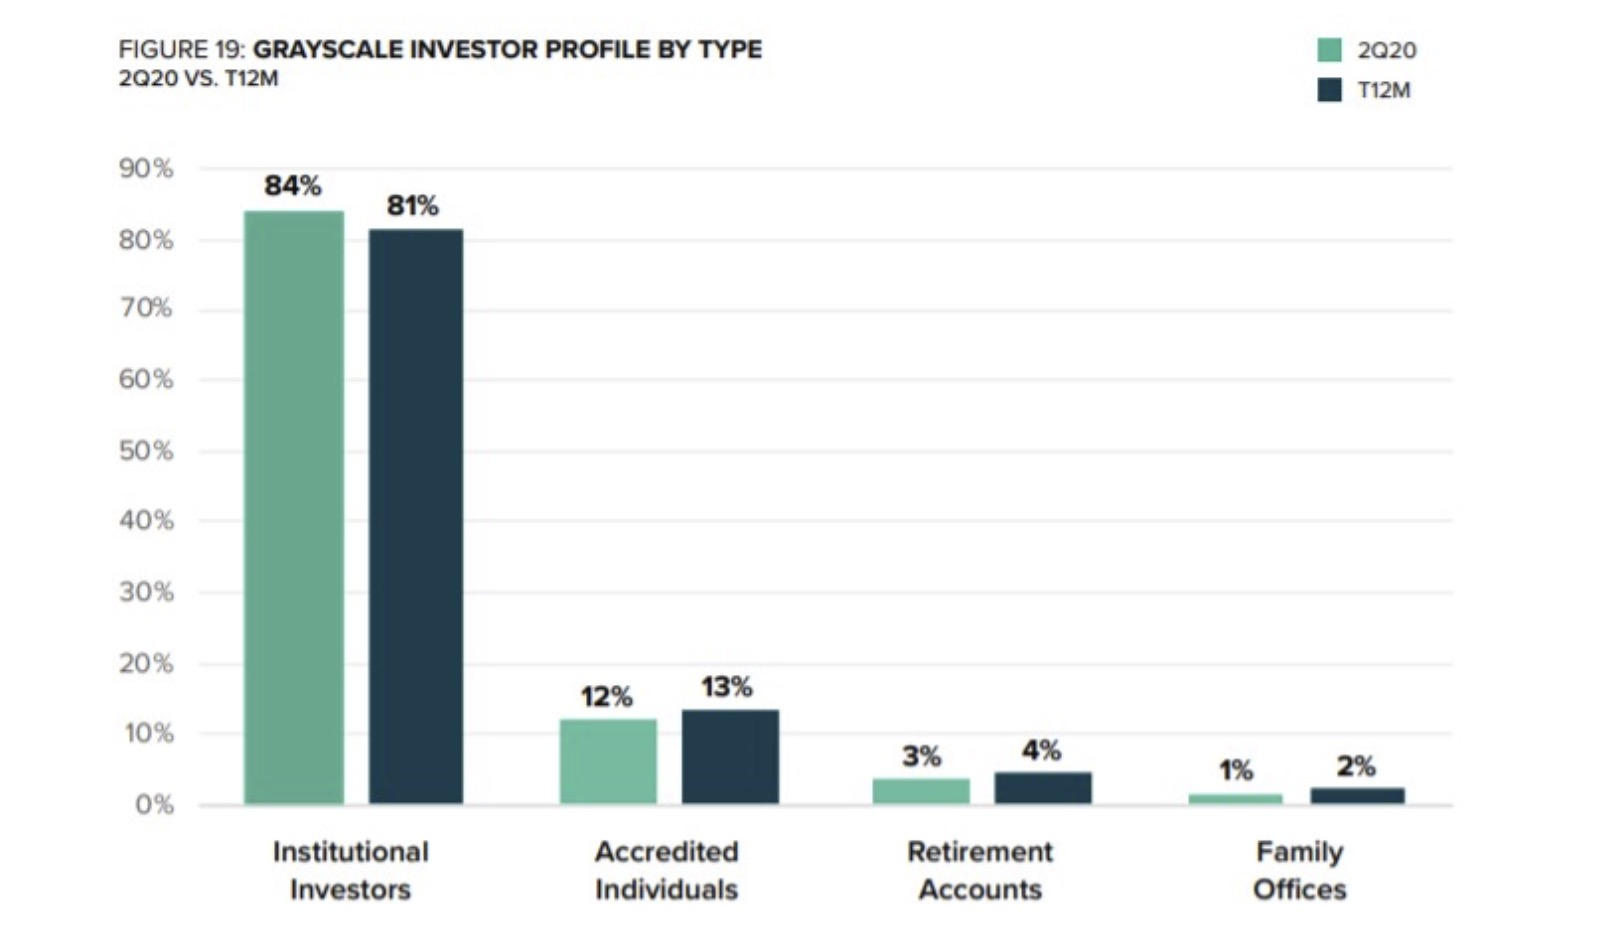

**This final figure** shows that the inflow of deposits to Grayscale (noting the traditionally large proportion of in-kind deposits) is quite large when considering the actual number of new Bitcoins mined. It is apparent that investors have a massive appetite for Bitcoin exposure, notably since Bitcoin's mining difficulty increase in May of this year.

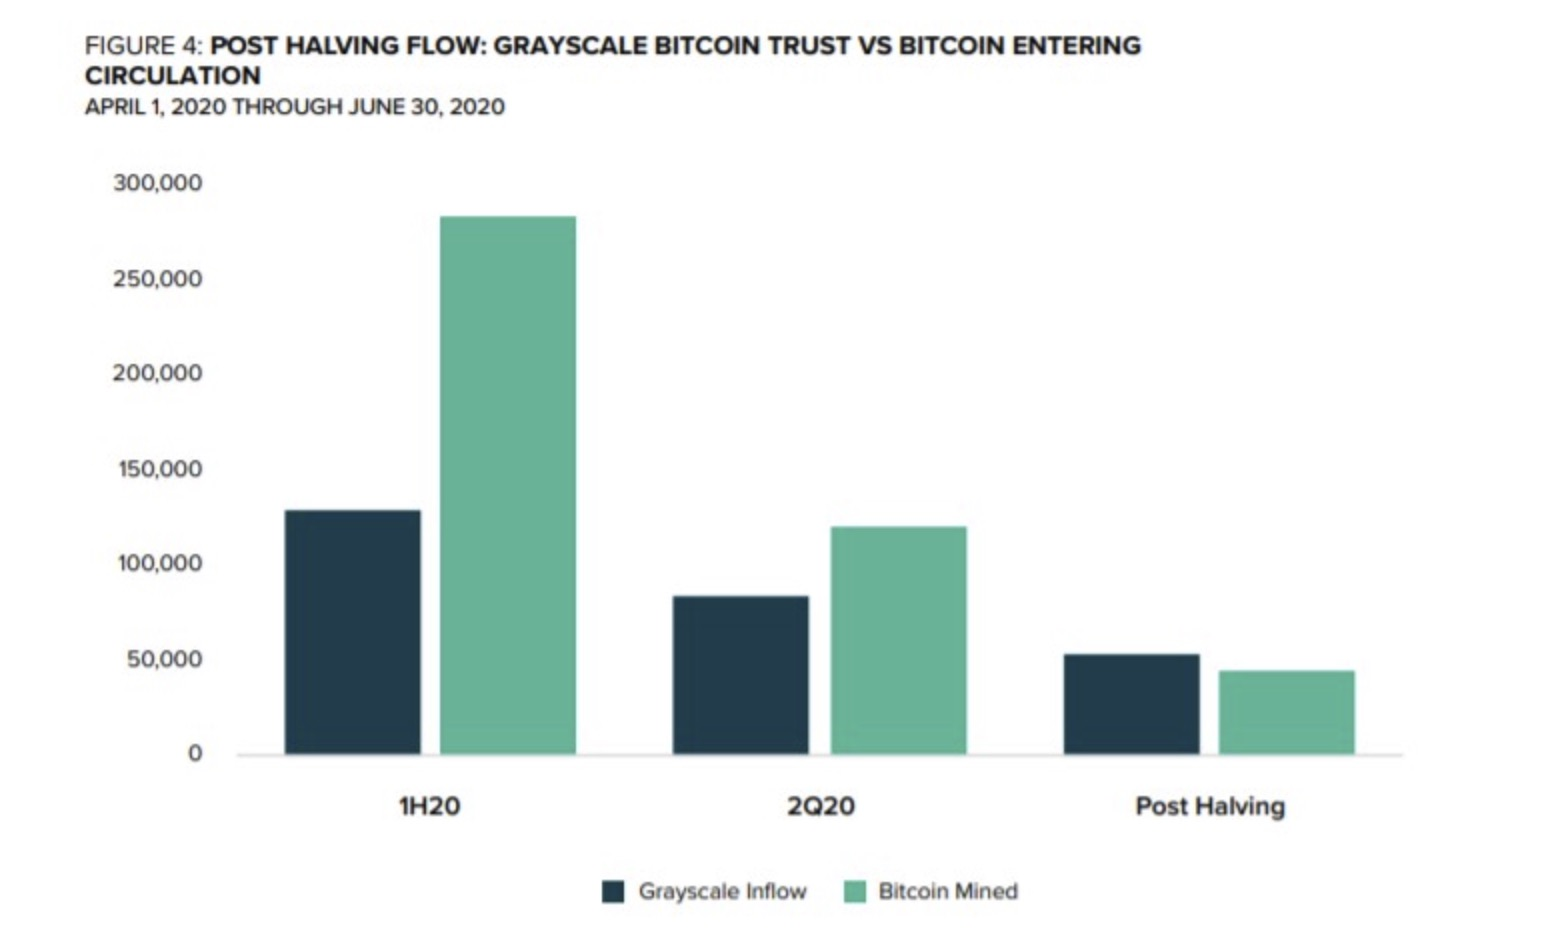

----------------------------------------------------------------------------------------------------------------------

## GBTC's High Premium

It is common knowledge that Grayscale Bitcoin Trust (GBTC) trades at a relatively high premium to the trust's actual NAV. For the purposes of this strategy, I am accepting that this markup is a function of two interplaying features: **access to exposure** and **risk premium**.

##### Access to Exposure 
Investors who lack the experience, resources, or mandates to trade bitcoin directly through cryptocurrency exchanges but still desire to be exposed to bitcoin, have essentially one option: Grayscale Bitcoin Trust (GBTC). GBTC is currently the only product in the United States SEC-regulated spot markets which offers direct exposure to Bitcoin. For these investors, getting this exposure is as easy as buying GBTC shares on the retail market, and benefits such as zero hassle with blockchain and storing shares in tax-advantaged accounts make this vehicle more desirable. 

These benefits are arguably a symptom of the immaturity of cryptocurrency in the traditional markets and therefore is subject to change as the space evolves, but nonetheless, these benefits currently serve the investor base enough to justify stable bids at consistently high premiums.

##### Risk Premium
With Grayscale's private placement, accredited and institutional investors may deposit cash or in-kind (Bitcoin) with Grayscale and be issued GBTC shares at NAV. As of April 2020, these issued GBTC shares are subject to a 6 month holding period before the investor may sell these shares on secondary markets. To many institutional buyers with mandates for long exposure to Bitcoin, this is a straightforward trade (Deposit cash/BTC with Grayscale for GBTC at NAV > hold shares for 6 months > manage risk > sell GBTC to collect the premium). 

Participation in this private placement, though shares purchased are issued at NAV, requires investors to consider an unavoidable time component within their investment model. If we were to take this to an impossibly extreme case (if shares could be generated and then immediately sold on secondary markets), the market would tighten significantly and stabilize at or much closer to the NAV. Though the time component might not directly impact market value, it certinaly has an indirect affect on market value.

----------------------------------------------------------------------------------------------------------------------

# The Strategy: BTCUSD-GBTC (Pseudo) Basis Trade

#### Description:
*The strategy I propose is aimed at capitalizing off of the relationship between GBTC and the BTCUSD spot. With assurance from my analysis, I believe that this relationship resembles that of a spot and future on the spot, **allowing us to treat the percent difference in premium between GBTC and BTCUSD like a basis.** With data from additional analysis of this basis, patterns of periodicity and trend can be derived, allowing traders to make short or long term positional bets with minimal risk and no minimum size requirements (outside of operational requirements or risk limits).*

#### Setup:
- GBTC OHLC data is daily and pulled from yahoo finance (delayed OTC data) in csv format. 
- BTCUSD OHLC data is daily and pulled from yahoo finance (Coinmarketcap VWAP) in csv format.
- Analysis will be performed using popular data science packages for python within a jupyter notebook.


#### Assumptions:
- Data acquired for analysis requires no cleaning (usually not the case, but a cursory check validates assumption).
- The BTCUSD benchmarking index is reasonably comparable to the index Grayscale uses for their benchmarking (TradeBlock XBX Index 24-hour VWAP).
- Weekend OHLC data for GBTC is either purposefully left out or filled with the data from T-1.
- No data from overnight trading of BTCUSD is included (it is useful, but not necessary to lay out the strategy).
- Traders have the ability to consistently sell GBTC long shares or locate shares for GBTC short selling.
- Traders have the ability to consistently (within reason) rebalance Bitcoin and GBTC between wallets, accounts, exchanges, etc.

In [1]:
# Requirements and Settings
import pandas as pd
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

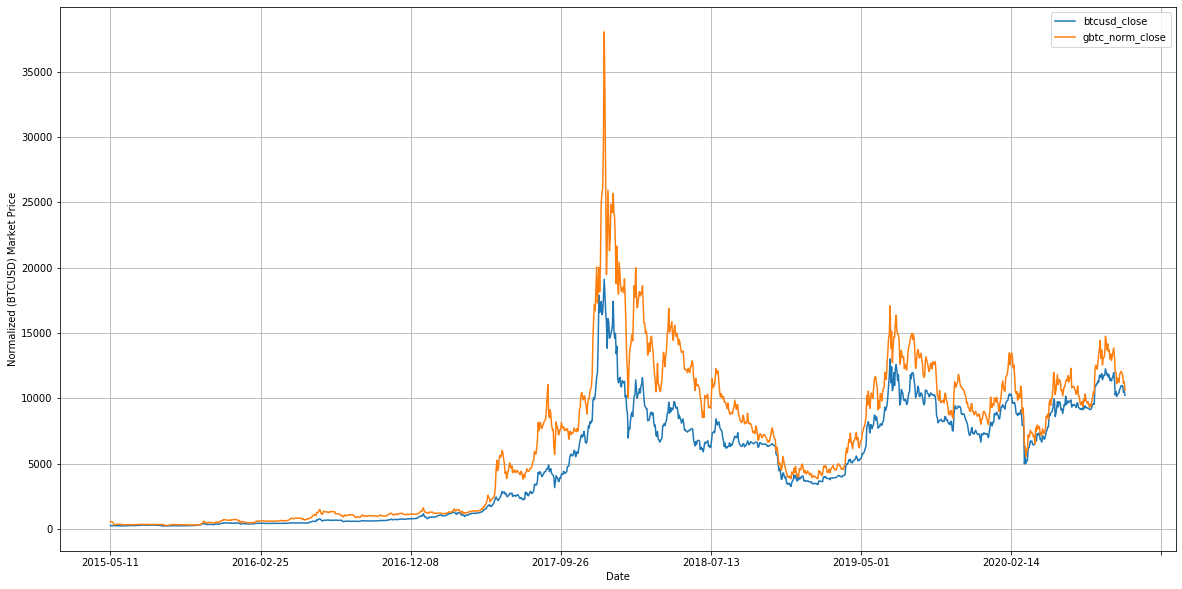

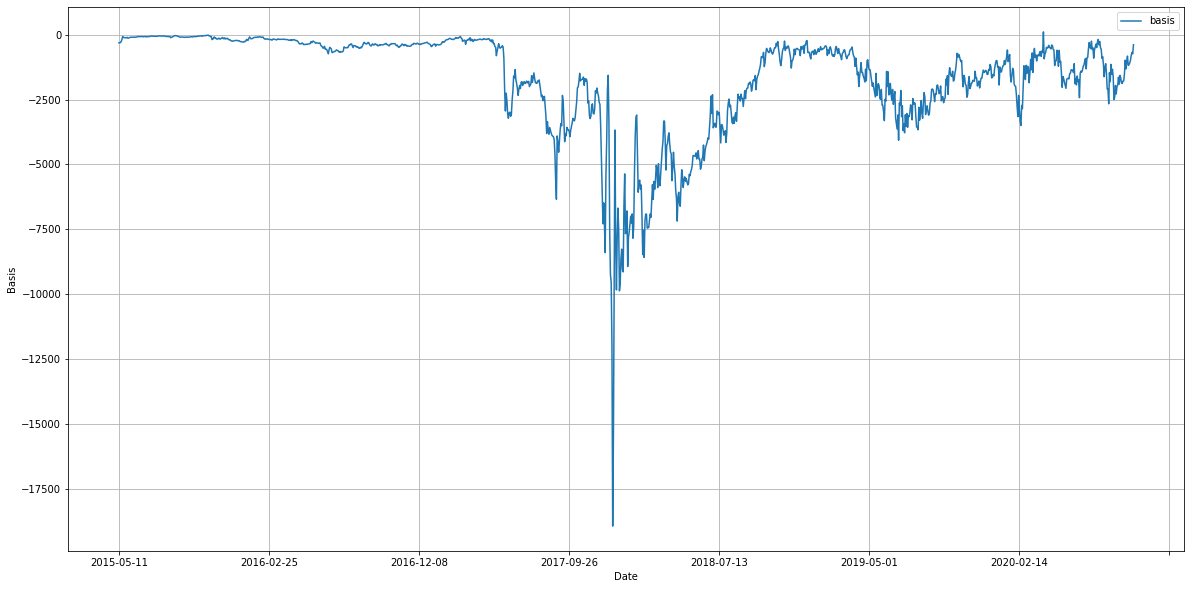

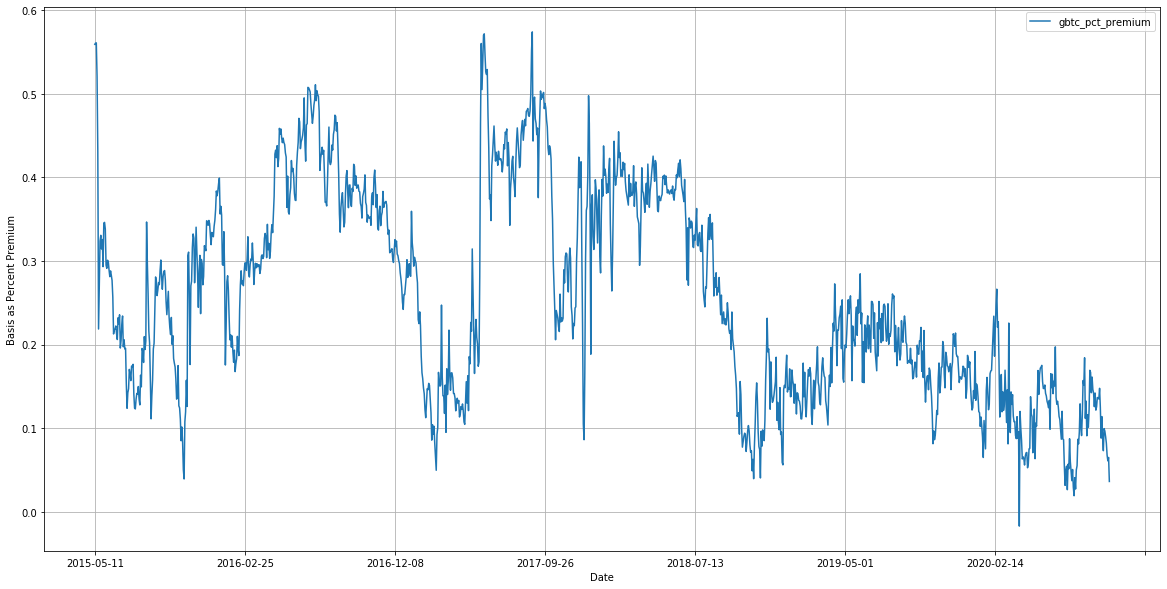

In [2]:
# Pull CSV Data
btcusd_ohlc = pd.read_csv('data/BTC-USD.csv').rename(columns={'Close':'btcusd_close', 'Volume':'btcusd_volume'})
gbtc_ohlc = pd.read_csv('data/GBTC.csv').rename(columns={'Close':'gbtc_close', 'Volume':'gbtc_volume'})

# Drop NA Data (Would Forward Fill if using Weekend Data)
combined_drop_df = pd.concat([btcusd_ohlc.set_index('Date'), gbtc_ohlc.set_index('Date')], axis=1).dropna()

# Normalize GBTC to BTC and Build Basis Feature
analysis_df = combined_drop_df[['btcusd_close', 'gbtc_close']]
analysis_df['gbtc_norm_close'] = analysis_df['gbtc_close'] * 1000
analysis_df['basis'] = (analysis_df['btcusd_close'] - analysis_df['gbtc_norm_close'])
analysis_df['gbtc_pct_premium'] = 1 - (analysis_df['btcusd_close'] / analysis_df['gbtc_norm_close'])
analysis_df = analysis_df.reset_index().rename(columns={'index':'date'})

# Market Price Plotting
price_plot = analysis_df.plot(x='date', y=['btcusd_close', 'gbtc_norm_close'], kind='line', figsize=(20,10))
price_plot.set(xlabel="Date", ylabel="Normalized (BTCUSD) Market Price")
price_plot.grid('on', which='major', axis='x')
price_plot.grid('on', which='major', axis='y')

# Basis Plotting
premium_plot = analysis_df.plot(x='date', y='basis', kind='line', figsize=(20,10))
premium_plot.set(xlabel="Date", ylabel="Basis")
premium_plot.grid('on', which='major', axis='x')
premium_plot.grid('on', which='major', axis='y')

# Basis as Pct Premium Plotting
price_plot = analysis_df.plot(x='date', y=['gbtc_pct_premium'], kind='line', figsize=(20,10))
price_plot.set(xlabel="Date", ylabel="Basis as Percent Premium")
price_plot.grid('on', which='major', axis='x')
price_plot.grid('on', which='major', axis='y')

Looking at the available data for the premium of GBTC's market value over NAV, the output is quite noisy. Yet, there are several events worth discussing in relation to the plot:
<br><br>
- Grayscale ceased issuing shares prior to their filing of Form S-1 with the SEC and began reissuing shares through private placement on December 4, 2017.
    - *The lull in activity allowed markets to widen out, which is advantageous for private placement clients.*
<br><br>
- The trust registered as an SEC Reporting entity Q1 2020, with an effective date of April 20, 2020 for a new holding period of 6 months (previously a 12 month holding period).
    - *This "halving" of the holding period inevitably shifts the paradigm of the market toward patterns with shorter periods. *
<br><br>
- Most markets were highly volatile during the coronavirus-induced crash, occurring from around March 16, 2020 through the end of March 2020.
    - *This was the **only** time in the dataset (only 1 day) where the relationship entered backwardation.*
<br><br>
- Bitcoin mining difficulty increased on May 11, 2020, decreasing block reward from 12.5 to 6.25 BTC. Historically, halving is followed by a gradual increase in spot price.
    - *We see less of an impact on premiums and more of an impact on share issuance, as the NAV of GBTC shares makes up a massive proportion of the NAV of bitcoin mined in 2020.*
<br><br>
- Large institutions tend to make trading decisions based on monthly, quarterly, and annual bases. Moreover, institutions tend to rebalance their portolios toward the end of the year for tax purposes, and many of the GBTC shares owned by these institutions were held for greater than one year, making it a profitable transaction to realize profits while premiums are trading higher. 
    - *We see a bearish trend for premiums around December of each year.*
<br><br>


----------------------------------------------------------------------------------------------------------------------

## A Deeper Look into 2020:

Operating under the assumption that the shorter holding period (Effective April 20, 2020) will have a great impact on the periodicity of the relationship between GBTC and BTCUSD, it would be useful to do deeper analysis on a YTD dataset.



Basis Statistics:


,count,mean,std,min,25%,50%,75%,max
basis,183.0,-1268.855189,652.977325,-3496.613281,-1682.12207,-1211.446289,-772.623291,111.776367



Basis (Represented by the Percent Premium) Statistics:


,count,mean,std,min,25%,50%,75%,max
gbtc_pct_premium,183.0,0.117262,0.046938,-0.01721,0.086815,0.119864,0.145106,0.266307


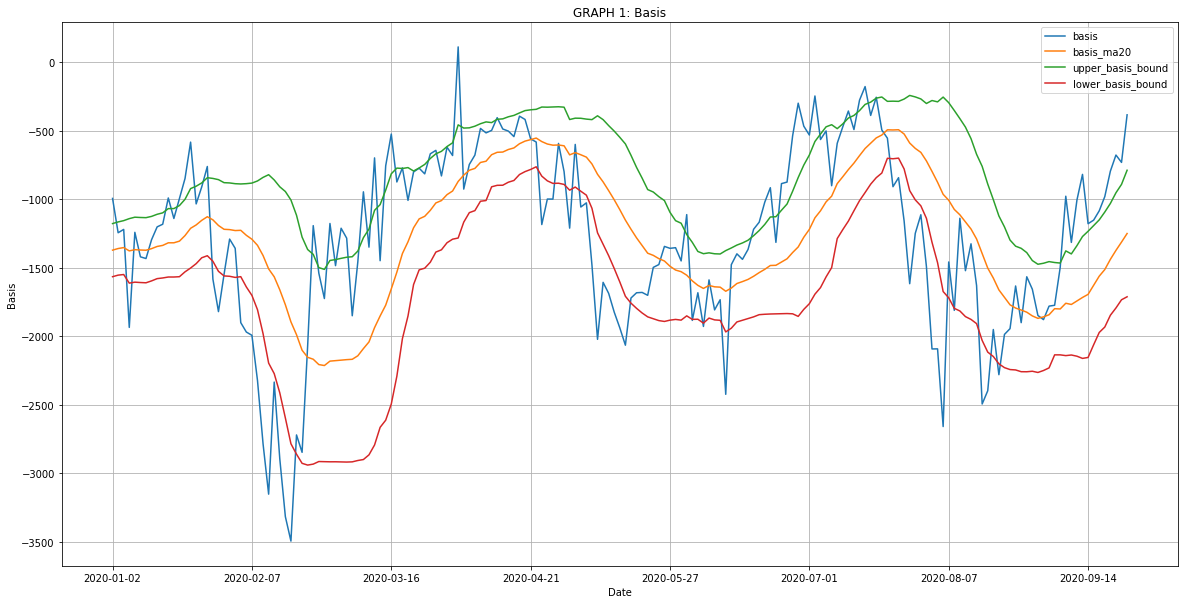

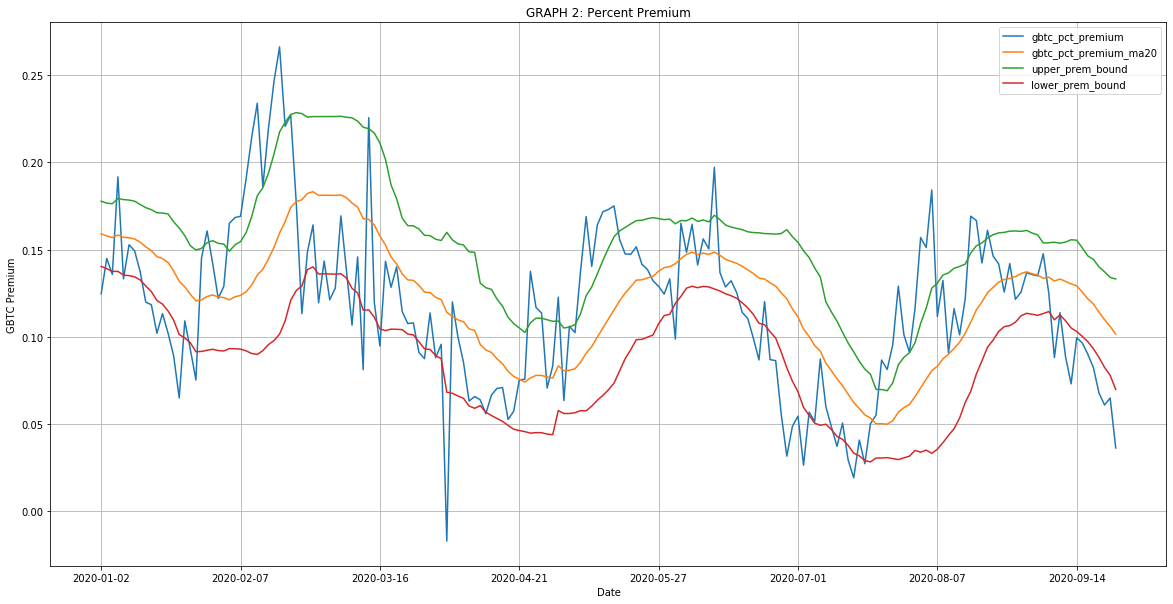

In [3]:
# Create Features for Statistics and Plotting
analysis_df['basis_ma20'] = analysis_df['basis'].rolling(window=20).mean()
analysis_df['basis_std20'] = analysis_df['basis'].rolling(window=20).std()
analysis_df['upper_basis_bound'] = analysis_df['basis_ma20'] + (analysis_df['basis_std20'])
analysis_df['lower_basis_bound'] = analysis_df['basis_ma20'] - (analysis_df['basis_std20'])
analysis_df['gbtc_pct_premium_ma20'] = analysis_df['gbtc_pct_premium'].rolling(window=20).mean()
analysis_df['gbtc_pct_premium_std20'] = analysis_df['gbtc_pct_premium'].rolling(window=20).std()
analysis_df['upper_prem_bound'] = analysis_df['gbtc_pct_premium_ma20'] + (analysis_df['gbtc_pct_premium_std20'])
analysis_df['lower_prem_bound'] = analysis_df['gbtc_pct_premium_ma20'] - (analysis_df['gbtc_pct_premium_std20'])

# Create YTD Dataframes
ytd_df = analysis_df.loc[analysis_df['date'].str.contains('2020')]
ytd_premium_df = ytd_df[['gbtc_pct_premium']]
ytd_df = analysis_df.loc[analysis_df['date'].str.contains('2020')]
ytd_basis_df = ytd_df[['basis']]

# Display Basis Curve
ytd_plot = ytd_df.plot(
    x='date', 
    y=['basis', 'basis_ma20', 'upper_basis_bound', 'lower_basis_bound'], 
    kind='line', 
    figsize=(20,10), 
    title="GRAPH 1: Basis"
)
ytd_plot.set(xlabel="Date", ylabel="Basis")
ytd_plot.grid('on', which='major', axis='x')
ytd_plot.grid('on', which='major', axis='y')

# Display Basis as Percent Premium Curve
ytd_plot = ytd_df.plot(
    x='date', 
    y=['gbtc_pct_premium', 'gbtc_pct_premium_ma20', 'upper_prem_bound', 'lower_prem_bound'], 
    kind='line', 
    figsize=(20,10),
    title="GRAPH 2: Percent Premium"
)
ytd_plot.set(xlabel="Date", ylabel="GBTC Premium")
ytd_plot.grid('on', which='major', axis='x')
ytd_plot.grid('on', which='major', axis='y')

# Display Stats
print('\n\nBasis Statistics:')
display(ytd_basis_df.describe().T)
print('\nBasis (Represented by the Percent Premium) Statistics:')
display(ytd_premium_df.describe().T)
print('\n')

Above, along with the basic statistics, I have plotted both the Basis (Graph 1 Blue) and the GBTC premium as a percent of the price of Bitcoin (Graph 2 Blue). I have overlaid a 20-Day moving average (Yellow) in an effort to smooth the curve without destroying the integrity of the data or skewing the information. I have also included 1-STD upper (Green) and lower (Red) bands around the moving average. 
<br>
## Important Features Visible within the Analysis:
1. This year, there appears to be a sinusoidal periodicity about the premium seemingly correlated with the the fiscal quarters. This supports my hypothesis that this product will display more pronounced patterns around fiscal reporting and taxation periods.<br><br>
2. The premium remains in contango for almost 100% of the dataset. This stability provides confidence in my choice of a "basis trade" outlook and bolsters the theory that the demand for this product is stable and strong.<br><br>
3. There is strong short term mean reversion, which is tradeable.

## Suggestions for Trading the Strategy:

Essentially, the position is best entered when the basis is trading outside of the bounds set and is signaling a reversion to the mean.

- Trade delta neutral by putting both legs on simultaneously on each exchange.<br><br>
- Set tolerances for entry/exit such that long or short basis positions are not held beyond our risk limits.<br><br>
- Set maximum size for long or short basis positions according to risk limits.<br><br>
- Keep the risk low and trade often.<br><br>


----------------------------------------------------------------------------------------------------------------------

# Further Research:
- I would like to dive deeper into the impact of trade volume and open interest on direction of basis movement, factoring in volume and open interest from Bitcoin spot and even derivatives across the biggest exchanges<br><br>
- I only had access to daily data, but more granular data (hour/min/sec/ms) would allow us to seek intraday opportunities for quicker trade turnarounds.<br><br>
- I first had included overnight and weekend Bitcoin trading into the analysis -- I ended up removing it to simplify the strategy, but I believe information from the Bitcoin markets will produce meaningful outcomes or trading signals.<br><br>
- I have a sneaking suspicion that the basis I see between the spot and GBTC is somehow correlated with the expected basis of a 6-month Bitcoin Future (synthetically derived, as futures do not trade that far out). <br><br>

# Conclusions:

I thoroughly enjoyed conducting this research sprint. Though I wish I could take the analysis deeper, I think the depth and time spent serve as a good base for seeking out and justifying a potential trading strategy. Something I learned from an old colleague of mine which resonated with me throughout this sprint is "ideation is about rapid development, prototyping, and mobility." I think it is important in a space like cryptocurrency that the generation of ideas for trading and investing can keep up with the development of the space. Certainly, considering maturity is a huge factor to make good investments, but the truth is that nothing in this space is really mature, so it takes a keen eye, plastic brain, and enthusiastic mentality to stay on the cutting edge.

----------------------------------------------------------------------------------------------------------------------